# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Terabox_1.csv")
df.head()

,userName,score,at,content
0,Jemekan Kediri,5,2024-04-30 09:25:11,Bisa liat bokep
1,Daff GT,2,2024-04-30 09:24:43,Banyak iklan
2,月 EventryRizky R リズキ,2,2024-04-30 09:23:20,Aplikasi nya bagus tetapi yang bikin ngeselin ...
3,Listika Hasan,5,2024-04-30 09:21:22,fathur karisa
4,Guava Jam,1,2024-04-30 09:09:12,uninstall ah gak kuat iklannya 🤣🤣🤣


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Bisa liat bokep,Jemekan Kediri,2024-04-30 09:25:11
1,Banyak iklan,Daff GT,2024-04-30 09:24:43
2,Aplikasi nya bagus tetapi yang bikin ngeselin ...,月 EventryRizky R リズキ,2024-04-30 09:23:20
3,fathur karisa,Listika Hasan,2024-04-30 09:21:22
4,uninstall ah gak kuat iklannya 🤣🤣🤣,Guava Jam,2024-04-30 09:09:12
...,...,...,...
194,Aplikasi penonton iklan,Bawon Kurniawan,2024-04-29 06:10:06
195,aku hanya ingin tahu,Herman Salim,2024-04-29 05:58:47
196,Serunya lagi di terabox ada video bokep,Rereh Chan 26,2024-04-29 05:58:04
197,Anjayyyyy bagusss,Aku Reivant,2024-04-29 05:55:55


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,188,199,199
top,bagus,Jemekan Kediri,2024-04-30 09:25:11
freq,3,1,1


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(188, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bisa liat bokep,Jemekan Kediri,2024-04-30 09:25:11
1,banyak iklan,Daff GT,2024-04-30 09:24:43
2,aplikasi nya bagus tetapi yang bikin ngeselin ...,月 EventryRizky R リズキ,2024-04-30 09:23:20
3,fathur karisa,Listika Hasan,2024-04-30 09:21:22
4,uninstall ah gak kuat iklannya,Guava Jam,2024-04-30 09:09:12
...,...,...,...
194,aplikasi penonton iklan,Bawon Kurniawan,2024-04-29 06:10:06
195,aku hanya ingin tahu,Herman Salim,2024-04-29 05:58:47
196,serunya lagi di terabox ada video bokep,Rereh Chan 26,2024-04-29 05:58:04
197,anjayyyyy bagusss,Aku Reivant,2024-04-29 05:55:55


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bisa liat bokep,Jemekan Kediri,2024-04-30 09:25:11
1,banyak iklan,Daff GT,2024-04-30 09:24:43
2,aplikasi nya bagus tetapi yang bikin ngeselin ...,月 EventryRizky R リズキ,2024-04-30 09:23:20
3,fathur karisa,Listika Hasan,2024-04-30 09:21:22
4,uninstall ah tidak kuat iklannya,Guava Jam,2024-04-30 09:09:12
...,...,...,...
194,aplikasi penonton iklan,Bawon Kurniawan,2024-04-29 06:10:06
195,aku hanya ingin tahu,Herman Salim,2024-04-29 05:58:47
196,serunya lagi di terabox ada video bokep,Rereh Chan 26,2024-04-29 05:58:04
197,anjayyyyy bagusss,Aku Reivant,2024-04-29 05:55:55


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,liat bokep,Jemekan Kediri,2024-04-30 09:25:11
1,banyak iklan,Daff GT,2024-04-30 09:24:43
2,aplikasi nya bagus yang bikin ngeselin aplikas...,月 EventryRizky R リズキ,2024-04-30 09:23:20
3,fathur karisa,Listika Hasan,2024-04-30 09:21:22
4,uninstall ah kuat iklannya,Guava Jam,2024-04-30 09:09:12
...,...,...,...
194,aplikasi penonton iklan,Bawon Kurniawan,2024-04-29 06:10:06
195,aku ingin tahu,Herman Salim,2024-04-29 05:58:47
196,serunya di terabox video bokep,Rereh Chan 26,2024-04-29 05:58:04
197,anjayyyyy bagusss,Aku Reivant,2024-04-29 05:55:55


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                          [liat, bokep]
1                                        [banyak, iklan]
2      [aplikasi, nya, bagus, yang, bikin, ngeselin, ...
3                                       [fathur, karisa]
4                        [uninstall, ah, kuat, iklannya]
                             ...                        
194                          [aplikasi, penonton, iklan]
195                                   [aku, ingin, tahu]
196                 [serunya, di, terabox, video, bokep]
197                                 [anjayyyyy, bagusss]
198                                                   []
Name: content, Length: 188, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terabox_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terabox_1.csv', encoding = 'latin1')
df_clean

,content
0,liat bokep
1,banyak iklan
2,aplikasi nya bagus yang bikin ngeselin aplikas...
3,fathur karisa
4,uninstall ah kuat iklan
...,...
183,aplikasi tonton iklan
184,aku ingin tahu
185,seru di terabox video bokep
186,anjayyyyy bagusss


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Terabox_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 11.4MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,liat bokep
1,banyak iklan
2,aplikasi nya bagus yang bikin ngeselin aplikas...
3,fathur karisa
4,uninstall ah kuat iklan
...,...
183,aplikasi tonton iklan
184,aku ingin tahu
185,seru di terabox video bokep
186,anjayyyyy bagusss


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terabox_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terabox_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,liat bokep,Look at the AVs.
1,1,banyak iklan,A lot of commercials.
2,2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...
3,3,fathur karisa,fathur carisa
4,4,uninstall ah kuat iklan,Uninstall ah Strong ad
...,...,...,...
183,183,aplikasi tonton iklan,Advertising applications
184,184,aku ingin tahu,I want to know.
185,185,seru di terabox video bokep,fun in terabox AV video
186,186,anjayyyyy bagusss,Anjayyyyy goodss


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Terabox_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,liat bokep,Look at the AVs.
1,1,banyak iklan,A lot of commercials.
2,2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...
3,3,fathur karisa,fathur carisa
4,4,uninstall ah kuat iklan,Uninstall ah Strong ad
...,...,...,...
183,183,aplikasi tonton iklan,Advertising applications
184,184,aku ingin tahu,I want to know.
185,185,seru di terabox video bokep,fun in terabox AV video
186,186,anjayyyyy bagusss,Anjayyyyy goodss


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 80
Netral = 91
Negatif = 17

Total Data Seluruhnya : 188


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,liat bokep,Look at the AVs.,Netral
1,1,banyak iklan,A lot of commercials.,Netral
2,2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...,Positif
3,3,fathur karisa,fathur carisa,Netral
4,4,uninstall ah kuat iklan,Uninstall ah Strong ad,Positif
...,...,...,...,...
183,183,aplikasi tonton iklan,Advertising applications,Netral
184,184,aku ingin tahu,I want to know.,Netral
185,185,seru di terabox video bokep,fun in terabox AV video,Positif
186,186,anjayyyyy bagusss,Anjayyyyy goodss,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,liat bokep,Look at the AVs.,Netral
1,banyak iklan,A lot of commercials.,Netral
2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...,Positif
3,fathur karisa,fathur carisa,Netral
4,uninstall ah kuat iklan,Uninstall ah Strong ad,Positif
...,...,...,...
183,aplikasi tonton iklan,Advertising applications,Netral
184,aku ingin tahu,I want to know.,Netral
185,seru di terabox video bokep,fun in terabox AV video,Positif
186,anjayyyyy bagusss,Anjayyyyy goodss,Netral


# **Visualisasi**


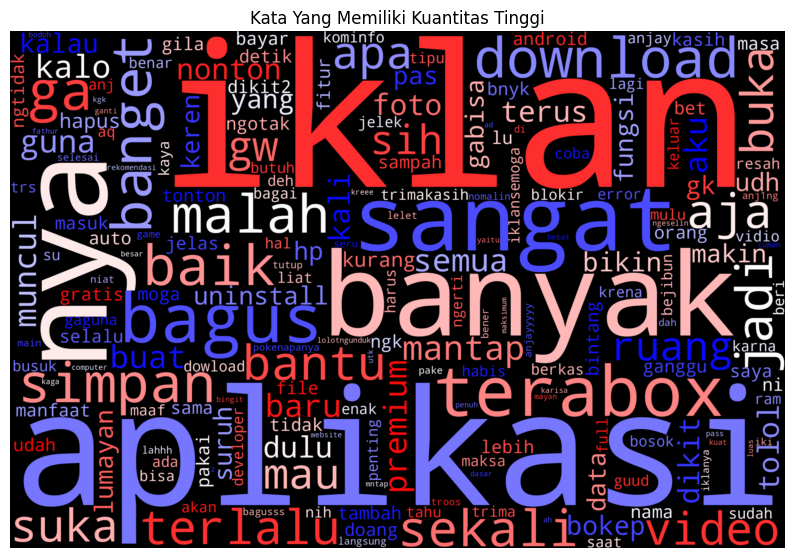

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


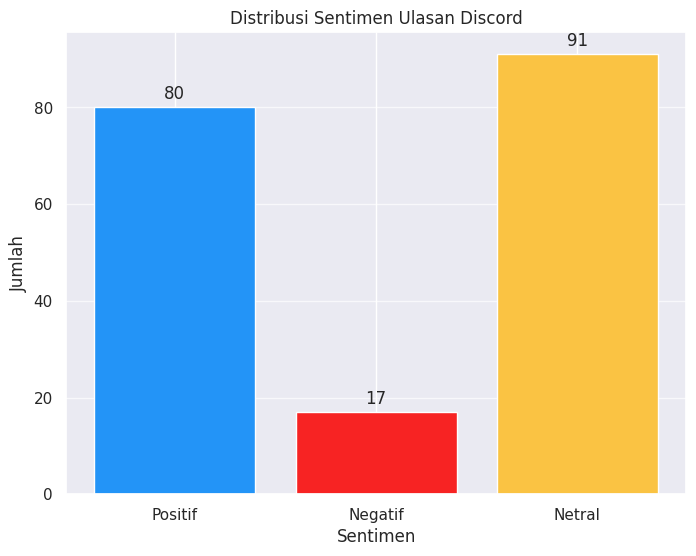

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...,Positif
4,uninstall ah kuat iklan,Uninstall ah Strong ad,Positif
6,baik,Okay.,Positif
7,bagus simpan nya baik luas enak,Good. Keep it. Good.,Positif
9,bodoh udah simpan video nya terabox buka makin...,I was stupid to keep the video open. The bigge...,Positif
...,...,...,...
175,keren,Cool.,Positif
176,terlalu ganggu banyak iklan terus saat pencet ...,Too much ads continue when the cross-signer of...,Positif
177,lumayan,Not bad.,Positif
179,aahhhhhhh enak lancar bange ahhhhhhhhhhhhhhhhh...,aahhhhhhh delicious smooth bange ahhhhhhhhhh a...,Positif


In [40]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
2,aplikasi nya bagus yang bikin ngeselin aplikas...,Advertising the app is good. It's a lot of adv...,1
4,uninstall ah kuat iklan,Uninstall ah Strong ad,1
6,baik,Okay.,1
7,bagus simpan nya baik luas enak,Good. Keep it. Good.,1
9,bodoh udah simpan video nya terabox buka makin...,I was stupid to keep the video open. The bigge...,1
...,...,...,...
175,keren,Cool.,1
176,terlalu ganggu banyak iklan terus saat pencet ...,Too much ads continue when the cross-signer of...,1
177,lumayan,Not bad.,1
179,aahhhhhhh enak lancar bange ahhhhhhhhhhhhhhhhh...,aahhhhhhh delicious smooth bange ahhhhhhhhhh a...,1


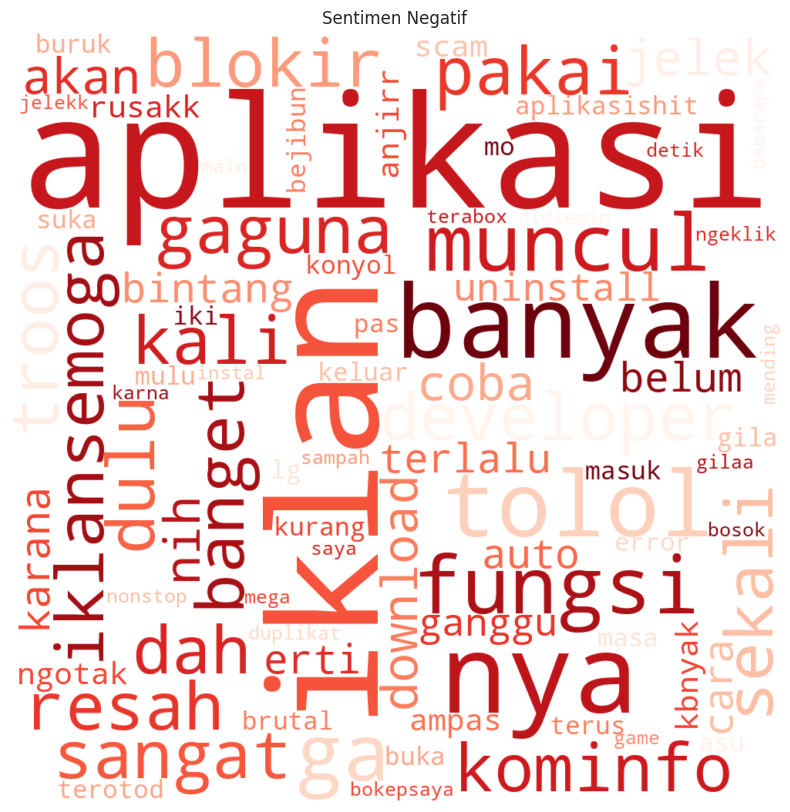

In [41]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

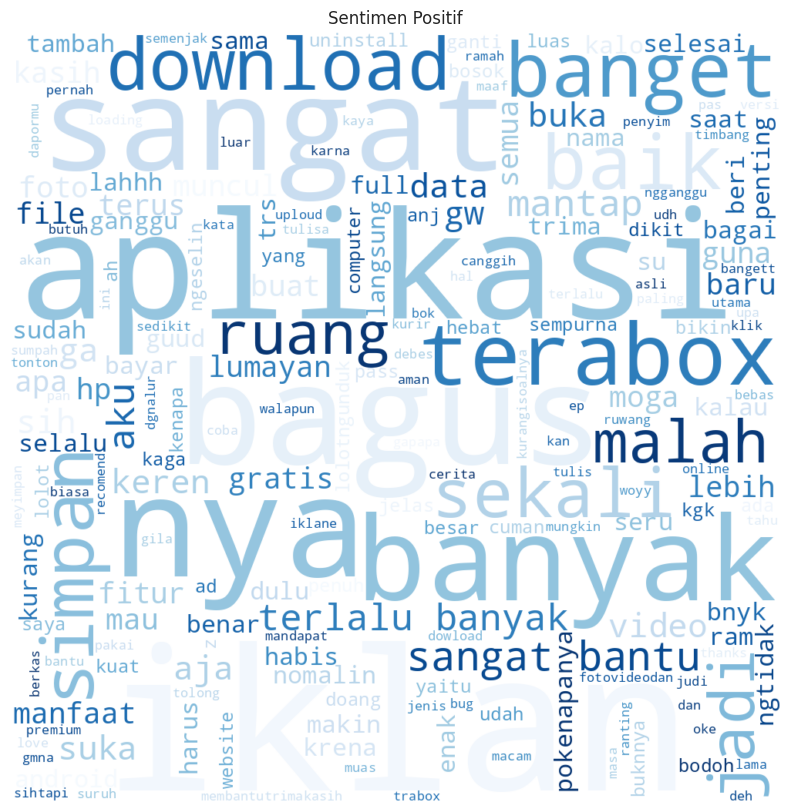

In [42]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [43]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    80
0    17
Name: count, dtype: int64

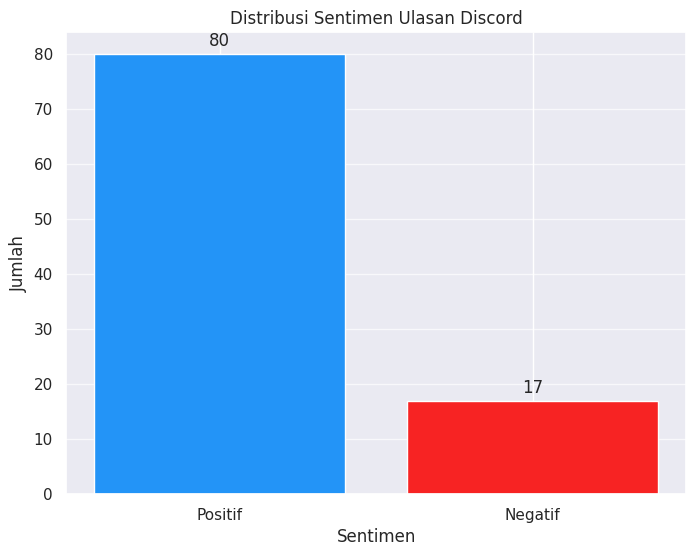

In [44]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

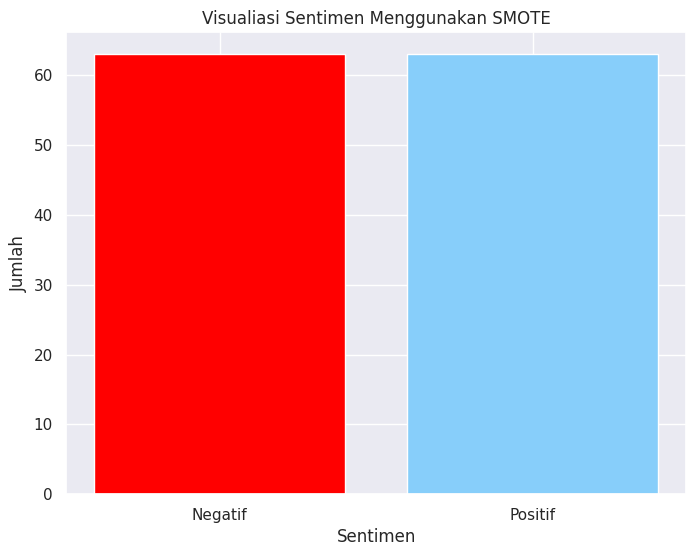

In [49]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [50]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [51]:
y_pred = naive_bayes.predict(X_test_vec)

In [52]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.40      0.67      0.50         3
     Positif       0.93      0.82      0.87        17

    accuracy                           0.80        20
   macro avg       0.67      0.75      0.69        20
weighted avg       0.85      0.80      0.82        20



# **Testing**


In [54]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi tolol
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [55]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus bisa nonton film
Hasil Analisis Sentimen Untuk Teks Baru : Positif
